# PDF Summarization Midterm Project

## By Mandy Liu, Mt. San Antonio College, CISB63 Fall 2023

<img src ="Reishi_Banner.jpg" style="width:800px;heightt:40px" align="left"/>

## Introduction

Summarizing PDF documents using Natural Language Processing (NLP) is an important tool for gaining insight into the content. NLP-powered summarization can quickly extract the most important information from lengthy PDF documents, saving time compared to manual reading and summarizing, which can be time-consuming, especially for large files. Summaries make it easier to locate and retrieve key information from a document. NLP can be applied to documents in various languages, enabling multilingual summarization, which is valuable for global businesses and international research. In some cases, NLP-generated summaries can serve as a starting point for content generation, such as creating abstracts for research papers.

## Summary and Conclusion

In this project, I summarized one of my publications titled 'Inhibitory activity of the medicinal mushroom Ganoderma lucidum on colorectal cancer by attenuating inflammation.' In this PDF document, there are a total of 15 pages, comprising 8,235 words and 560 sentences. The text was tokenized into sentences and subsequently split into words. These words were converted to lowercase and cleaned by removing punctuation and stopwords. Subsequently, the words were rejoined into a string with space separators for further analysis. Term Frequency-Inverse Document Frequency (TF-IDF) scores were then calculated to identify the top three sentences in the document. Additionally, a summary and a frequency distribution plot were generated based on the top three sentences with the highest TF-IDF scores. Named Entity Recognition (NER) was also utilized to identify and classify the named entities in the text, with visualization being achieved using the spaCy displaCy module. Cosine similarity was employed to compare this document with another of my publications titled 'The medicinal mushroom Ganoderma lucidum attenuates UV-induced skin carcinogenesis and immunosuppression.' Both of these publications explore different forms of cancer, namely colon and skin cancers, through the use of the medicinal mushroom Ganoderma lucidum. A WordCloud was generated to provide a visual summarization of the PDF file.

The techniques applied in this project are invaluable for summarizing a text document, offering a quick overview of the paper's content. I also attempted to translate the first sentence of the abstract into Chinese, which yielded satisfactory results. However, when I attempted to translate the entire text, certain sections were missing, and not all the text was processed or translated. Furthermore, there are some inaccurately labeled entities in the NER that require correction. This can potentially be improved by experimenting with different NER models or libraries. It's worth noting that the choice of the NER model can significantly impact the accuracy of entity recognition. Manually correcting all the mislabeled entities can be time-consuming. If labeled data is available, it can be used to annotate mislabeled entities and retrain the NER model. The Cosine similarity score obtained was 0.848. This suggests that 84.8% of the terms or words in the two texts share similarity or have overlapping word usage. I concur with this score, as the two papers revolve around a similar topic, meaning that the introduction, background information, discussion, and summary may contain similar words. Additionally, they also share some similar in vitro and in vivo techniques involving cells and mice.

In summary, this project serves as an effective means of summarizing a PDF document. While it excels at summarizing multiple publications, the utility of NLP becomes more apparent when applied to a broader range of documents rather than just a few. Research articles are often well-organized, and one can typically find a summary in the abstract. However, techniques such as NER and cosine similarity prove extremely useful in labeling, extracting valuable information, and identifying similar articles for review.

## Reference Links

https://pubmed.ncbi.nlm.nih.gov/35692861/

https://pubmed.ncbi.nlm.nih.gov/35312729/

My github: https://github.com/mandyliu-1/CISB63

## Import Libraries

In [1]:
import nltk                                                      # NLTK
from nltk.corpus import stopwords                                # Stopwords
from nltk.tokenize import sent_tokenize, word_tokenize           # Tokenize
from nltk.probability import FreqDist                            # Frequency distribution analysis

from textblob import TextBlob                                    # TextBlob                 

from sklearn.feature_extraction.text import TfidfVectorizer      # TF-IDF vectorizer
from sklearn.feature_extraction.text import CountVectorizer      # Count vectorizer
from sklearn.metrics.pairwise import cosine_similarity           # Cosine similarity

import spacy                                                     # Named Entity Recognition
from spacy import displacy                                       # Displacy

import numpy as np                                               # NumPy

import re                                                        # Regular expressions

import PyPDF2                                                    # Read PDF files

import string                                                    # String manipulation

import matplotlib.pyplot as plt                                  # Matplotlib

from wordcloud import WordCloud                                  # WordCloud

from PIL import Image                                            # Image module

## Read the File

In [2]:
# Open the PDF file
with open('/Users/mmliu/Desktop/CISB63/CISB63_midterm_MandyLiu/data/Inhibitory activity of medicinal mushroom on colorectal cancer.pdf', 'rb') as pdf_file:
    # Create a PDF reader object
    pdf_reader = PyPDF2.PdfReader(pdf_file)

    # Initialize a variable to store the text
    text = ""

    # Iterate through each page and extract text
    for page in pdf_reader.pages:
        text += page.extract_text()

# Print or use the extracted text
print(text)


Precision Clinical Medicine , 4(4), 2021, 231–245
https://doi.org/10.1093/pcmedi/pbab023
Advance Access Publication Date: 28 August 2021Research Article
RESEARCH ARTICLE
Inhibitory activity of medicinal mushroom
Ganoderma lucidum on colorectal cancer by
attenuating inflammation
Mandy M. Liu1,§, Tiantian Liu2,§, Steven Yeung1, Zhijun Wang3,
Bradley Andresen1, Cyrus Parsa4,5, Robert Orlando4,5, Bingsen Zhou6,
Wei Wu6,X i aL i6, Yilong Zhang6, Charles Wang2,*and Ying Huang1,*
1Department of Pharmaceutical Sciences, College of Pharmacy, Western University of Health Sciences,
Pomona, CA 91766, USA
2Center for Genomics & Department of Basic Sciences, School of Medicine, Loma Linda University, Loma
Linda, CA 92350, USA
3Department of Pharmaceutical Sciences, College of Pharmacy, Marshall B. Ketchum University, Fullerton, CA
92831, USA
4College of Osteopathic Medicine of the Pacific, Western University of Health Sciences, Pomona, CA 91766, USA
5Department of Pathology, Beverly Hospital, Monteb

## Preprocess the text

### Get number of pages

In [3]:
# Get the number of pages
num_pages = len(pdf_reader.pages)

# Print the number of pages
print(f"Number of pages in the PDF: {num_pages}")

Number of pages in the PDF: 15


### Tokenize the text into sentences

In [4]:
sentences = sent_tokenize(text)
print(sentences)

['Precision Clinical Medicine , 4(4), 2021, 231–245\nhttps://doi.org/10.1093/pcmedi/pbab023\nAdvance Access Publication Date: 28 August 2021Research Article\nRESEARCH ARTICLE\nInhibitory activity of medicinal mushroom\nGanoderma lucidum on colorectal cancer by\nattenuating inflammation\nMandy M. Liu1,§, Tiantian Liu2,§, Steven Yeung1, Zhijun Wang3,\nBradley Andresen1, Cyrus Parsa4,5, Robert Orlando4,5, Bingsen Zhou6,\nWei Wu6,X i aL i6, Yilong Zhang6, Charles Wang2,*and Ying Huang1,*\n1Department of Pharmaceutical Sciences, College of Pharmacy, Western University of Health Sciences,\nPomona, CA 91766, USA\n2Center for Genomics & Department of Basic Sciences, School of Medicine, Loma Linda University, Loma\nLinda, CA 92350, USA\n3Department of Pharmaceutical Sciences, College of Pharmacy, Marshall B. Ketchum University, Fullerton, CA\n92831, USA\n4College of Osteopathic Medicine of the Pacific, Western University of Health Sciences, Pomona, CA 91766, USA\n5Department of Pathology, Bever

### Print the first sentence of the abstract

In [5]:
abstract_sent = sentences[1]
print(abstract_sent)

Abstract
The medicinal mushroom Ganoderma lucidum (GL, Reishi or Lingzhi) exhibits an inhibitory effect on cancers.


### Translate the frist sentence of the abstract to Chinese

In [6]:
# Create a TextBlob object with the text
blob = TextBlob(abstract_sent)

# Translate the text to Chinese
translated_blob = blob.translate('en', 'zh-TW')

# Print the translated text
print(translated_blob)

抽象的
藥用蘑菇ganoderma lucidum（GL，Reishi或Lingzhi）對癌症表現出抑製作用。


### Split the text into words and count the number of words

In [7]:
words = text.split()
total_words = len(words)

# Print the total number of words
print(f"Total number of words: {total_words}")

# Print the total number of sentences
print(f"Total number of Sentences: ", len(sentences)) 

Total number of words: 8235
Total number of Sentences:  560


### Remove punctuation and stopwords

In [8]:
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /Users/mmliu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/mmliu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Convert words to lowercase, remove stop words and remove non-alphabetic characters and symbols

In [9]:
def preprocess_text(text):
    
    # tokenize the input text into words and assign it to words variable
    words = word_tokenize(text)
    
    # converts each word in the list to lowercase
    # checks whether a word consists of alpha numeric characters; remove non-alphabetic characters and symbols
    words = [word.lower() for word in words if word.isalnum()]
    
    # remove stop words
    words = [word for word in words if word not in stop_words]
    
    # join the preprocessed words back together into a single string with space separators
    return ' '.join(words)

print(preprocess_text(text))

precision clinical medicine 4 4 2021 https advance access publication date 28 august 2021research article research article inhibitory activity medicinal mushroom ganoderma lucidum colorectal cancer attenuating inflammation mandy liu1 tiantian liu2 steven yeung1 zhijun wang3 bradley andresen1 cyrus robert bingsen zhou6 wei wu6 x al i6 yilong zhang6 charles wang2 ying huang1 1department pharmaceutical sciences college pharmacy western university health sciences pomona ca 91766 usa 2center genomics department basic sciences school medicine loma linda university loma linda ca 92350 usa 3department pharmaceutical sciences college pharmacy marshall ketchum university fullerton ca 92831 usa 4college osteopathic medicine pacific western university health sciences pomona ca 91766 usa 5department pathology beverly hospital montebello california ca 90640 usa 6beijing tong ren tang chinese medicine new territories hong kong 999077 china charles wang chwang ying huang yhuang charles wang http liu t

### Process a list of sentences and store the preprocessed versions of those sentences in a new list

In [10]:
preprocessed_sentences = []
for sentence in sentences:
    preprocessed_sentence = preprocess_text(sentence)
    preprocessed_sentences.append(preprocessed_sentence)

## Data Exploration and Visualization

### Calculate the Term Frequency-Inverse Document Frequency (TF-IDF) scores

In [11]:
# Calculate the overall importance of each sentence in the context of the entire document or corpus
# Higher TF-IDF score means more important or distinctive 
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(preprocessed_sentences)
tfidf_scores = tfidf_matrix.sum(axis=1)

### Find the top 3 sentences (highest TF-IDF scores)

In [12]:
# Find the most important sentences based on TF-IDF scores
top_sentence_indices = np.argsort(tfidf_scores, axis=0)[-3:]

In [13]:
top_sentence_indices

matrix([[234],
        [231],
        [  0]])

In [14]:
# Print one of the top sentences
preprocessed_sentences[234]

'gene id gene name log fc pvalue il1b interleukin 1 beta il11 interleukin 11 4930565n06rik riken cdna 4930565n06 gene nppb natriuretic peptide type b ptgs2 synthase 2 mmp10 matrix metallopeptidase 10 mmp13 matrix metallopeptidase 13 stamos signal transducing adaptor molecule sh3 domain itam motif 1 opposite cxcl1 chemokine motif ligand 1 mmp12 matrix metallopeptidase 12 fc log2 fold change smaller indicates lower expression tumors'

### Generate a summary of the document based on the top sentences with the highest TF-IDF scores

In [15]:
top_sentences = []

for index in range(len(top_sentence_indices)):
    val = preprocessed_sentences[index]
    print(index, val)
    top_sentences.append(sentences[index])

    # Join the top sentences to create the summary
    summary = ''.join(val) +  '.'

    print(summary)

0 precision clinical medicine 4 4 2021 https advance access publication date 28 august 2021research article research article inhibitory activity medicinal mushroom ganoderma lucidum colorectal cancer attenuating inflammation mandy liu1 tiantian liu2 steven yeung1 zhijun wang3 bradley andresen1 cyrus robert bingsen zhou6 wei wu6 x al i6 yilong zhang6 charles wang2 ying huang1 1department pharmaceutical sciences college pharmacy western university health sciences pomona ca 91766 usa 2center genomics department basic sciences school medicine loma linda university loma linda ca 92350 usa 3department pharmaceutical sciences college pharmacy marshall ketchum university fullerton ca 92831 usa 4college osteopathic medicine pacific western university health sciences pomona ca 91766 usa 5department pathology beverly hospital montebello california ca 90640 usa 6beijing tong ren tang chinese medicine new territories hong kong 999077 china charles wang chwang ying huang yhuang charles wang http liu

### Plot Frequency Distribution of words from top sentences

In [16]:
# Plotting Frequency Distribution of words will not accept lists as an input (top_sentences = [])
# Define top_sent_words; tokenize the top_sentences list and obtain a list of words
top_sent_words = [word for sentence in top_sentences for word in word_tokenize(sentence)]

In [17]:
# Create a function to preprocess top_sentences_words
def preprocess_text(top_sent_words):
    cleaned_top_sent_words = []
    
    for sentence in top_sent_words:
        # Tokenize each sentence into words
        words = word_tokenize(sentence)
        
        # Converts each word in the list to lowercase, checks whether a word consists of alphanumeric characters, 
        # and removes non-alphabetic characters and symbols
        words = [word.lower() for word in words if word.isalnum()]
        
        # Remove stop words
        words = [word for word in words if word not in stopwords.words('english')]
        
        # Join the preprocessed words back together into a single string with space separators
        cleaned_top_sent_words.append(' '.join(words))
    
    return cleaned_top_sent_words

# Call the preprocess_text function
cleaned_top_sent_words = preprocess_text(top_sent_words)

# Print the preprocessed sentences
print(cleaned_top_sent_words)

['precision', 'clinical', 'medicine', '', '4', '', '4', '', '', '2021', '', '', 'https', '', '', 'advance', 'access', 'publication', 'date', '', '28', 'august', '2021research', 'article', 'research', 'article', 'inhibitory', 'activity', '', 'medicinal', 'mushroom', 'ganoderma', 'lucidum', '', 'colorectal', 'cancer', '', 'attenuating', 'inflammation', 'mandy', '', 'liu1', '', '', '', 'tiantian', 'liu2', '', '', '', 'steven', 'yeung1', '', 'zhijun', 'wang3', '', 'bradley', 'andresen1', '', 'cyrus', '', '', 'robert', '', '', 'bingsen', 'zhou6', '', 'wei', 'wu6', '', 'x', '', 'al', 'i6', '', 'yilong', 'zhang6', '', 'charles', 'wang2', '', '', '', 'ying', 'huang1', '', '', '1department', '', 'pharmaceutical', 'sciences', '', 'college', '', 'pharmacy', '', 'western', 'university', '', 'health', 'sciences', '', 'pomona', '', 'ca', '91766', '', 'usa', '2center', '', 'genomics', '', 'department', '', 'basic', 'sciences', '', 'school', '', 'medicine', '', 'loma', 'linda', 'university', '', 'loma

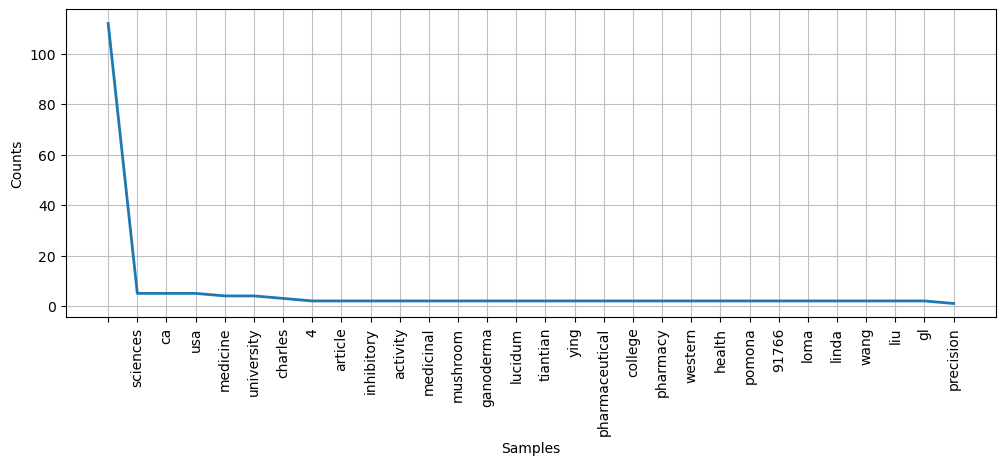

In [18]:
plt.figure(figsize=(12, 4))
fdist = nltk.FreqDist(cleaned_top_sent_words)
fdist.plot(30, cumulative=False)
plt.show()


### Named Entity Recognition

In [19]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [20]:
# Import the displaCy library
from spacy import displacy

In [21]:
# Create a dococument object
document = nlp(text)

In [22]:
# Define a function to display named entities along with their corresponding entity labels and explanations 
def show_ents(document):
    if document.ents:
        for ent in document.ents:
            print(ent.text + '-' + str(spacy.explain(ent.label_)))
show_ents(document)

Clinical Medicine-People, including fictional
4(4-Objects, vehicles, foods, etc. (not services)
2021-Absolute or relative dates or periods
231–245-Numerals that do not fall under another type
Advance Access Publication Date-Companies, agencies, institutions, etc.
28-Numerals that do not fall under another type
Article
RESEARCH ARTICLE-Named documents made into laws.
Ganoderma lucidum-Non-GPE locations, mountain ranges, bodies of water
Mandy M. Liu1,§-People, including fictional
Tiantian-Nationalities or religious or political groups
Steven Yeung1-People, including fictional
Zhijun Wang3-People, including fictional
Bradley-Companies, agencies, institutions, etc.
Robert Orlando4,5-People, including fictional
Bingsen Zhou6-People, including fictional
Wei Wu6,X-People, including fictional
Yilong Zhang6-People, including fictional
Charles Wang2,*and Ying Huang1-People, including fictional
1Department of Pharmaceutical Sciences-Monetary values, including unit
College of Pharmacy-Companies, a

In [23]:
# Visualize named entities in the text document using spaCy's displacy module
displacy.render(document, style='ent', jupyter=True)

### Cosine Similarity

In [24]:
# Load the second file for comparison
# The second pdf file had to be converted to text file because of some file protection and did not load correctly
# The second file was converted from pdf to text file using https://www.onlineocr.net/

# import chardet to auto-detect the encoding of the text file
import chardet

# Detect the file's encoding
with open('/Users/mmliu/Desktop/CISB63/CISB63_midterm_MandyLiu/data/The medicinal mushroom Ganoderma lucidum attenuates UV-induced skin carcinogenesis.txt', 'rb') as file:
    rawdata = file.read()
    result = chardet.detect(rawdata)

# Open the file with the detected encoding
with open('/Users/mmliu/Desktop/CISB63/CISB63_midterm_MandyLiu/data/The medicinal mushroom Ganoderma lucidum attenuates UV-induced skin carcinogenesis.txt', 'r', encoding=result['encoding']) as file:
    text_file = file.read()

print(text_file)


PLOS ONE







                                                      RESEARCH ARTICLE


                                                      The medicinal mushroom Ganoderma lucidum


                                                      attenuates UV-induced skin carcinogenesis


                                                      and immunosuppression



                                                      Ayaz Shahid 1*, Matthew Huang1, Mandy Liu1, Md Abdullah Shamim 1, Cyrus Parsa2,3, 
                                                      Robert Orlando2,3, Ying Huang1 *


                                                      1 Department of Pharmaceutical Sciences, College of Pharmacy, Western University of Health Sciences, 
                                                      Pomona, California, United States of America, 2 College of Osteopathic Medicine of the Pacific, Western 
                                                      University of Health Sciences, Pomona, Cal

In [25]:
# Convert words to lowercase, remove stop words and remove non-alphabetic characters and symbols in the text file
def preprocess_text(text_file):
    
    # tokenize the input text into words and assign it to words variable
    words = word_tokenize(text_file)
    
    # converts each word in the list to lowercase
    # checks whether a word consists of alpha numeric characters; remove non-alphabetic characters and symbols
    words = [word.lower() for word in words if word.isalnum()]
    
    # remove stop words
    words = [word for word in words if word not in stop_words]
    
    # join the preprocessed words back together into a single string with space separators
    return ' '.join(words)

print(preprocess_text(text_file))

plos one research article medicinal mushroom ganoderma lucidum attenuates skin carcinogenesis immunosuppression ayaz shahid 1 matthew huang1 mandy liu1 md abdullah shamim 1 cyrus robert ying huang1 1 department pharmaceutical sciences college pharmacy western university health sciences pomona california united states america 2 college osteopathic medicine pacific western university health sciences pomona california united states america 3 department pathology beverly hospital montebello california united states america ashahid yhuang yh abstract medicinal mushroom ganoderma lucidum traditionally used treating multiple open access eases including cancer study examined skin cancer preventive activity cial product containing spore fruiting body ratio glsf extracts glsf citation shahid huang liu shamim parsa c orlando r et al 2022 medicinal spore component gls prepared using artificial gastrointestinal juice examined mushroom ganoderma lucidum attenuates jb6 cells glsf gls inhibited epider

In [26]:
# Create TF-IDF vectors
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([text, text_file])

# Calculate cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])

# Print the cosine similarity score
print("Cosine Similarity Score:", cosine_sim[0][0])


Cosine Similarity Score: 0.847872119674535


### WordCloud

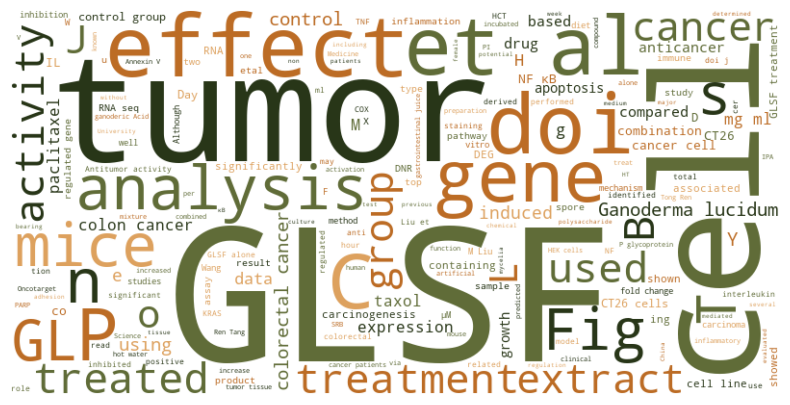

In [27]:
# Generate a word cloud from text (pdf file)
# Define a custom color function that returns four specific colors
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = ["#bc6c25", "#dda15e", "#606c38", "#283618"]
    
    # Generate a random color from the list
    return colors[np.random.randint(0, len(colors))]  

# Generate a word cloud from text (pdf file) with custom colors
wordcloud = WordCloud(width=800, height=400, background_color="white", 
                      color_func=color_func, random_state=39).generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [28]:
# Save the word cloud image
wordcloud.to_file('wordcloud.png')